# 2. Experimentation on a simple Machine Learning algorithm

The **k-nearest neighbour** is one of the simplest algorithm used in Machine Learning. This algorithm classifies objects based on **features**. In Machine Learning, a **feature** is an individual measurable property or characteristic of a phaenomenon being observed.

Assuming that we want to develop a program to identify whether a person is a ballet dancer or a rugby player, which of the following features you consider distinguishing?

In [1]:
from Widget import *
from getFeedbackOnFeatureSelection import *
from IPython.display import *

#Widget generator - please don't change
newWidget = Widget (['Height', 'Weight', 'Age', 'Sex', 'Name'], 'Features')
newWidget.createSelectMultiple()
newWidget.displayWidget()

#Generate the feedback - please don't change the code

feedbackQ1 = getFeedbackOnFeatureSelection(newWidget)
feedbackQ1.createButton("Get feedback")
feedbackQ1.displayButton()

def on_button_clicked(b):
    clear_output()
    feedbackQ1.printFeedback(newWidget)
feedbackQ1.button.on_click(on_button_clicked)

SelectMultiple(description='Features', options=('Height', 'Weight', 'Age', 'Sex', 'Name'), value=())

Button(description='Get feedback', style=ButtonStyle())

In our analysis, consider the data sets below collected from a sample of ballet dancer and rugby players. In this table, we will represent **males** as 0 and **females** as 1.

|Person|Sex (0/1)|Age |Weight (Kg)|Height (cm)|
|------|---------|----|-----------|-----------|
|     1|        1|  24|         63|        190|
|     2|        1|  20|         55|        185|
|     3|        0|  25|         75|        202|
|     4|        1|  30|         50|        180|
|     5|        0|  19|         57|        174|
|     6|        0|  31|         85|        150|
|     7|        1|  28|         93|        145|
|     8|        0|  29|         75|        130|
|     9|        0|  24|         99|        163|
|    10|        0|  30|        100|        171|

Now, let's represent these values in 2-dimentional spaces taking different groups of 2 features into consideration. Please execute the code below to see how **weight** and **age** data is distributed in a 2 dimentional space.

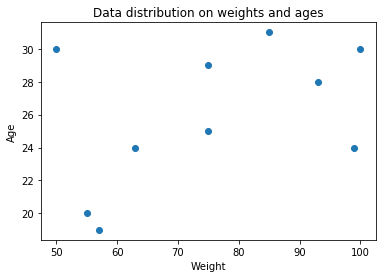

In [3]:
from numpy import *
import matplotlib.pyplot as plt

#Collect the weights and ages from the table
weights = [63, 55, 75, 50, 57, 85, 93, 75, 99, 100]
ages = [24, 20, 25, 30, 19, 31, 28, 29, 24, 30]

plt.scatter(weights,ages)
plt.title("Data distribution on weights and ages")
plt.xlabel("Weight")
plt.ylabel("Age")
plt.show()

It seems that from the graphic above it's impossible to identify **clusters**. This is because the age is not a distinguishing element that could separate rugby players and ballet dancers. Let's see how it works with **heights** and **weights**.

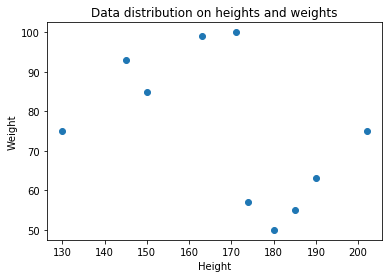

In [4]:
#Collect the heights and weights from the table
heights = [190, 185, 202, 180, 174, 150, 145, 130, 163, 171]
weights = [63, 55, 75, 50, 57, 85, 93, 75, 99, 100]

plt.scatter(heights,weights)
plt.title("Data distribution on heights and weights")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

By choosing the **heights** and **weights** features to clasify these examples, two clusters of data can be distinguished: *top-left* and *bottom-right*. 

In your opinion, which one of these represents the rugby players? Execute the code below and choose your answer.

In [5]:
#Create the selection box - please don't change
from getFeedbackOnClusters import *

clusterWidget = Widget (['Top-left', 'Bottom-right'], 'Clusters')
clusterWidget.createSelectSingle()
clusterWidget.displayWidget()

#Create the feedback button - don't change the code
feedbackQ2 = getFeedbackOnClusters(clusterWidget)
feedbackQ2.createButton("Get feedback")
feedbackQ2.displayButton()

def on_button_clicked(b):
    clear_output()
    feedbackQ2.printFeedback(clusterWidget)
feedbackQ2.button.on_click(on_button_clicked)

Select(description='Clusters', options=('Top-left', 'Bottom-right'), value='Top-left')

Button(description='Get feedback', style=ButtonStyle())